In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('data/gym_members_exercise_tracking.csv')
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [7]:
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [8]:
df.shape

(973, 15)

The dataset contains data of 973 sessions

In [9]:
df.dtypes

Age                                int64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
dtype: object

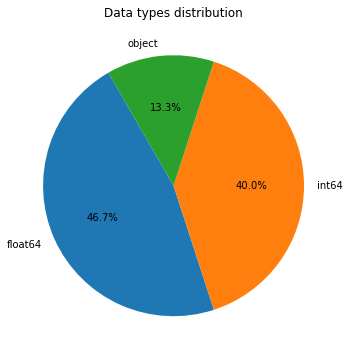

In [10]:
data_types = df.dtypes.value_counts()

plt.figure(figsize=(8, 6))
plt.pie(data_types, labels=data_types.index, autopct='%1.1f%%', startangle=120)
plt.title('Data types distribution')
plt.show()

In [11]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


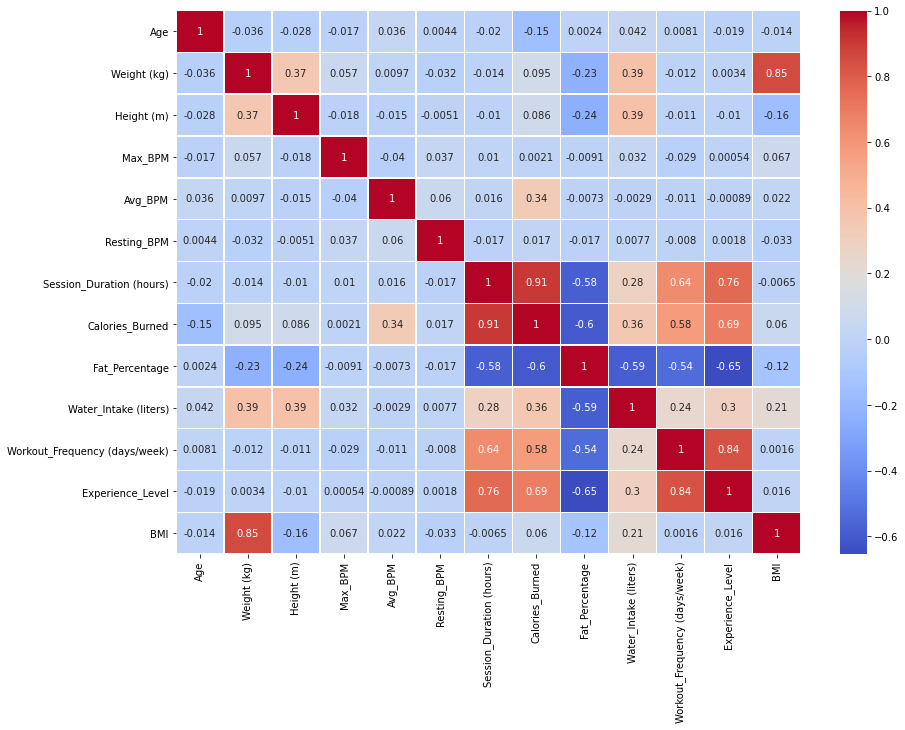

In [12]:
correlation_matrix = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [47]:
correlation_df = correlation_matrix.unstack().reset_index()
correlation_df.columns = ['Variable 1', 'Variable 2', 'Correlation']

correlation_df = correlation_df[correlation_df['Variable 1'] != correlation_df['Variable 2']]

correlation_df['Pair'] = correlation_df.apply(lambda row: tuple(sorted([row['Variable 1'], row['Variable 2']])), axis=1)
correlation_df = correlation_df.drop_duplicates(subset='Pair').drop(columns='Pair')

correlation_df = correlation_df.sort_values(by='Correlation', ascending=False, key=abs).reset_index(drop=True)
correlation_df.index += 1

print('Top 10 Absolute Correlation Pairs')
correlation_df.head(10)


Top 10 Absolute Correlation Pairs


,Variable 1,Variable 2,Correlation
1,Session_Duration (hours),Calories_Burned,0.908140
2,Weight (kg),BMI,0.853158
3,Workout_Frequency (days/week),Experience_Level,0.837079
4,Session_Duration (hours),Experience_Level,0.764768
5,Calories_Burned,Experience_Level,0.694129
6,Fat_Percentage,Experience_Level,-0.654363
7,Session_Duration (hours),Workout_Frequency (days/week),0.644140
8,Calories_Burned,Fat_Percentage,-0.597615
9,Fat_Percentage,Water_Intake (liters),-0.588683
10,Session_Duration (hours),Fat_Percentage,-0.581520


In [49]:
print('Top 10 Positive Correlation Pairs')
correlation_df[correlation_df['Correlation'] > 0].head(10).reset_index(drop=True)

Top 10 Positive Correlation Pairs


,Variable 1,Variable 2,Correlation
0,Session_Duration (hours),Calories_Burned,0.908140
1,Weight (kg),BMI,0.853158
2,Workout_Frequency (days/week),Experience_Level,0.837079
3,Session_Duration (hours),Experience_Level,0.764768
4,Calories_Burned,Experience_Level,0.694129
5,Session_Duration (hours),Workout_Frequency (days/week),0.644140
6,Calories_Burned,Workout_Frequency (days/week),0.576150
7,Weight (kg),Water_Intake (liters),0.394276
8,Height (m),Water_Intake (liters),0.393533
9,Weight (kg),Height (m),0.365321


In [50]:
print('Top 10 Negative Correlation Pairs')
correlation_df[correlation_df['Correlation'] < 0].head(10).reset_index(drop=True)

Top 10 Negative Correlation Pairs


,Variable 1,Variable 2,Correlation
0,Fat_Percentage,Experience_Level,-0.654363
1,Calories_Burned,Fat_Percentage,-0.597615
2,Fat_Percentage,Water_Intake (liters),-0.588683
3,Session_Duration (hours),Fat_Percentage,-0.581520
4,Fat_Percentage,Workout_Frequency (days/week),-0.537060
5,Workout_Type_Cardio,Workout_Type_Strength,-0.357985
6,Workout_Type_Strength,Workout_Type_Yoga,-0.342774
7,Workout_Type_Cardio,Workout_Type_Yoga,-0.340063
8,Workout_Type_HIIT,Workout_Type_Strength,-0.325645
9,Workout_Type_Cardio,Workout_Type_HIIT,-0.323069


Positive correlations:
- Calories burned with session duration (0.91): A longer session usually means more calories burned
- BMI and Weight (0.85): The more the BMI the more a person weights
- Experience level with session duration (0.76), calories burned (0.69), workout percentage (0.84): A person with more experience use to workout harder and more frequently
- Session duration and workout frequency (0.65): A person who workouts frequently usually has longer sessions

Negative correlations:
- Fat percentage wit experience level (-0.65), session duration (-0.58), calories burned (-0.6), water intake (-0.59): A person with a big fat percentage usually has little workout experience. Due to that inexperience and lack of physical fitness, the sessions are usually shorter and of worst quality, resulting in less calories burned and less need for hydratation.

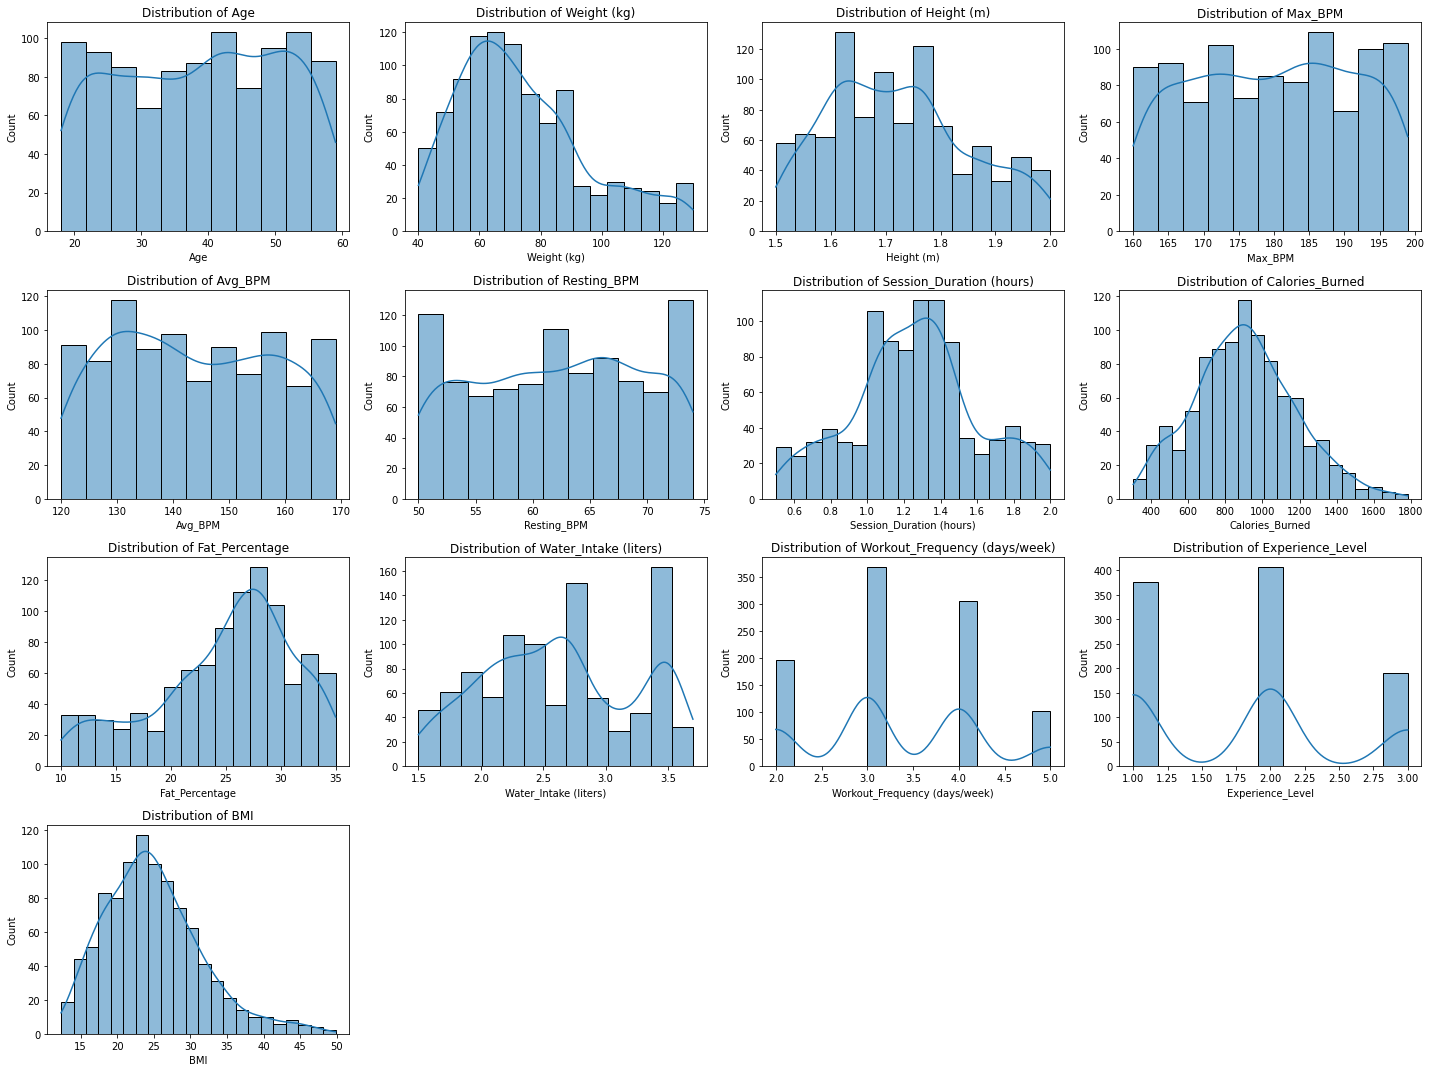

In [51]:
# Graficar distribuciones de variables numéricas
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

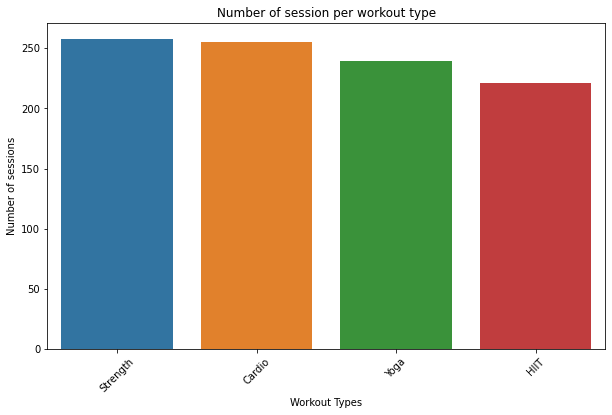

Strength sessions: 258
Cardio sessions: 255
Yoga sessions: 239
HIIT sessions: 221


In [56]:
workout_type_counts = df['Workout_Type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=workout_type_counts.index, y=workout_type_counts.values)

plt.xticks(rotation=45)
plt.xlabel("Workout Types")
plt.ylabel("Number of sessions")
plt.title("Number of session per workout type")

plt.show()

print('Strength sessions:', df[df['Workout_Type'] == 'Strength'].shape[0])
print('Cardio sessions:', df[df['Workout_Type'] == 'Cardio'].shape[0])
print('Yoga sessions:', df[df['Workout_Type'] == 'Yoga'].shape[0])
print('HIIT sessions:', df[df['Workout_Type'] == 'HIIT'].shape[0])
